<a href="https://colab.research.google.com/github/TAMIDSpiyalong/AI-in-AG-conference-Workshop-4-15/blob/main/Machine%20Learning%20Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Image Classification of an American Sign Language Dataset

In this section, we will perform the data preparation, model creation, and model training steps using a dataset with images of hands making letters in [American Sign Language](http://www.asl.gs/).

## Objectives

1. Use the [Keras API](https://keras.io/) to load the dataset and prepare it for training
2. Create a simple neural network to perform image classification
3. Create a convolutional neural network (CNN) for the same problem
4. Observe the performance of the trained neural network

## The Problem: Image Classification

In traditional programming, the programmer is able to articulate rules and conditions in their code that their program can then use to act in the correct way. This approach continues to work exceptionally well for a huge variety of problems.

Image classification, which asks a program to correctly classify an image it has never seen before into its correct class, is near impossible to solve with traditional programming techniques. How could a programmer possibly define the rules and conditions to correctly classify a huge variety of images, especially taking into account images that they have never seen?

In this lab, the problem is to build a model to automatically classify a given hand guesture in an image to the correct letter category. Humans can do this task fairly easy but it is difficult for traditional codes. Nerual network is more suitable for this kind of complex problem if we have enough traing data.

## American Sign Language Dataset

The [American Sign Language alphabet](http://www.asl.gs/) contains 26 letters. Two of those letters (j and z) require movement, so they are not included in the training dataset. Upload this dataset manually to your colab directory. You can find the files in your file explorer.

### Kaggle

This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

## Training and Validation Data Split

When working with images for deep learning, we need both the images themselves, usually denoted as `X`, and also, correct [labels](https://developers.google.com/machine-learning/glossary#label) for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for *training* the model, and then, a separate set of `X` and `Y` values for *validating* the performance of the model after it has been trained. Therefore, we need 4 segments of data for the dataset:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained

The process of preparing data for analysis is called [Data Engineering](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). To learn more about the differences between training data and validation data (as well as test data), check out [this article](https://machinelearningmastery.com/difference-test-validation-datasets/) by Jason Brownlee.

## Loading the Data

The sign language dataset is in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma Separated Values) format, the same data structure behind Microsoft Excel and Google Sheets. It is a grid of rows and columns with labels at the top, train and test dataset shold be downloaded in your colab folder now.

To load and work with the data, we'll be using a library called [Pandas](https://pandas.pydata.org/), which is a highly performant tool for loading and manipulating data. We'll read the CSV files into a format called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [41]:
import pandas as pd

Pandas has a [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method that expects a csv file, and returns a DataFrame:

In [42]:
train_df = pd.read_csv("sign_mnist_train.csv")
valid_df = pd.read_csv("sign_mnist_valid.csv")

### Exploring the Data

Let's take a look at our data. Each row is an image which has a `label` column, and also, 784 values representing each pixel value in the image. Note that the labels currently are numerical values, not letters of the alphabet:

In [43]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,12,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,22,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,17,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,16,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


The training dataset containes 27,455 grayscale images of hand gestures, corresponding to the first dimension of the matrix `train_df`. By executing the following cells, we can see the shape of the dataset 27455x785. Each row (image) itself will be reshaped back to the dimensions 28x28 without the labels. Similarly, there are 7,172 validation images.

In [44]:
train_df.shape

(27455, 785)

In [45]:
valid_df.shape

(7172, 785)

### Extracting the Labels

We would like to store our training and validation labels in `y_train` and `y_valid` variables. Notice that the unique number lables are missing number 9 and 25 corresponding to letter `j` and `z`.

In [46]:
y_train = train_df['label']
y_valid = valid_df['label']

In [47]:
print(sorted(y_train.unique()))
print(sorted(y_valid.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


### Extracting the Images

We would like to store our training and validation images in `x_train` and `x_valid` variables. Here we create those variables. Note that we are dropping the `label` column so the second dimension of the dataset become 784 from 785.

In [48]:
x_train = train_df.drop(['label'],axis=1).values
x_valid = valid_df.drop(['label'],axis=1).values

We now have 27,455 images with 784 pixels each for training...

In [49]:
x_train.shape

(27455, 784)

...as well as their corresponding labels:

In [50]:
y_train.shape

(27455,)

For validation, we have 7,172 images...

In [51]:
type(x_valid)

numpy.ndarray

...and their corresponding labels:

In [52]:
y_valid.shape

(7172,)

## Visualizing the Data

In neural networks, reshaping alters the dimensions of input tensors, flattening converts multi-dimensional arrays into one-dimensional vectors, and concatenating combines tensors along a specific axis. These operations enable efficient data manipulation, compatibility with different layers, and the integration of information from multiple sources or pathways within the network architecture. The following example shows what happens when we reshape.

In [53]:
import numpy as np

# Creating a 1D array with 12 elements
original_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Reshaping the 1D array to a 2D array with 4 rows and 3 columns
reshaped_array = original_array.reshape(4, 3)

print("Original 1D array:")
print(original_array)
print("Reshaped 2D array:")
print(reshaped_array)


Original 1D array:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Reshaped 2D array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Each row has the dimension of 784.

In [54]:
x_train[0].shape

(784,)

To visualize the images, we will use the matplotlib library. We don't need to worry about the details of this visualization, but if interested, you can learn more about [matplotlib](https://matplotlib.org/) at a later time.

Note that we'll have to reshape the first data from its current 1D shape of 784 pixels, to a 2D shape of 28x28 pixels to make sense of the image:

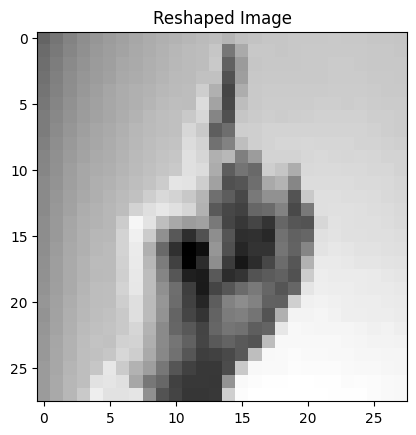

In [55]:
import matplotlib.pyplot as plt

# Replace this with your 784-dimensional vector representing the image
image_vector = x_train[0]

# Reshape the image vector to a 28x28 matrix
image_matrix = image_vector.reshape(28, 28)

# Visualize the image
plt.imshow(image_matrix, cmap='gray')
plt.title("Reshaped Image")
plt.show()


Now we can show 20 images with the labels.

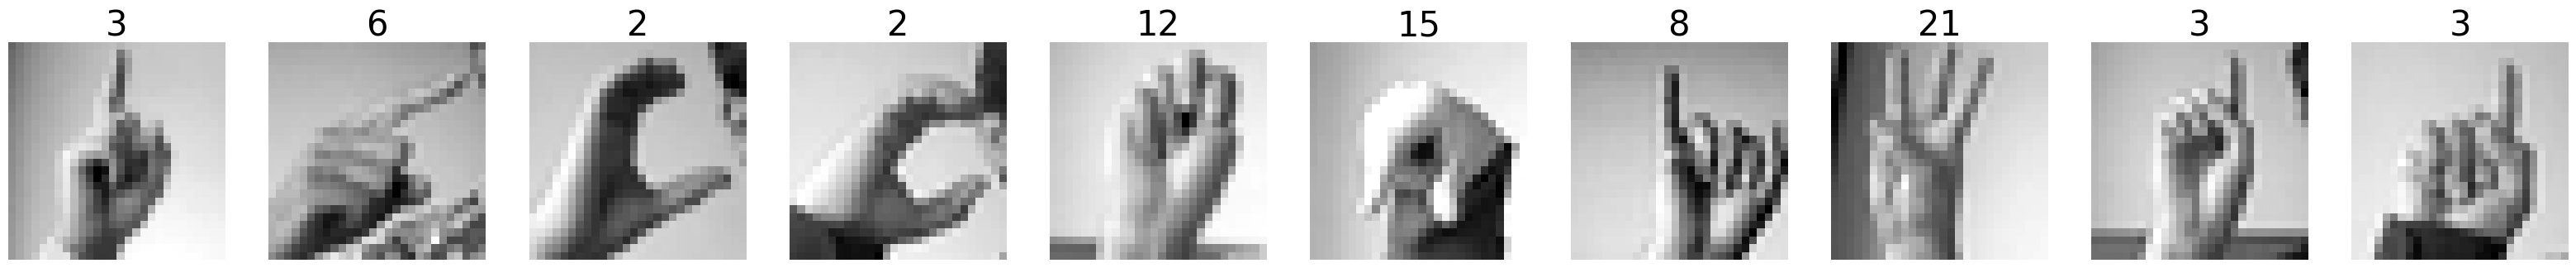

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 10
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Preparing the Data for Training

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

## Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called [normalization](https://developers.google.com/machine-learning/glossary#normalization), and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [57]:
x_train.min()

0

In [58]:
x_train.max()

255

In [59]:
x_train = x_train / 255
x_valid = x_valid / 255

In [60]:
x_train.min()

0.0

In [61]:
x_train.max()

1.0

## Categorize the Labels

We are going to categorically encode the labels. We can use the [keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) method to accomplish this by passing it the values to encode, and, the number of categories to encode it into. Categorical encoding is a vital preprocessing step in machine learning to convert categorical variables into numerical format. This enables machine learning algorithms, which require numerical input, to effectively process and make predictions on diverse datasets. Encoding techniques like one-hot encoding and ordinal encoding preserve the underlying information of the categories and maintain compatibility with various algorithms.

In [62]:
import tensorflow.keras as keras
num_classes = 24

In [63]:
if not y_train.shape[-1] == 24:  # Avoid running multiple times
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)

The following table shows for each image `X`, the encoded `Y` based on 26 classes hence 26 elements with one-hot encoding. One-hot encoding is a popular technique where each category is represented in binary (0 or 1). Each label vector has the same length as the total number of categories, and all elements are zero except for the index that corresponds to the category, which is set to one. One-hot encoding ensures that each category is uniquely represented, and it is particularly useful when there is no ordinal relationship among the categories.

In [64]:
import string
df= pd.DataFrame(y_train[0]).astype(int)
alphabet = list(string.ascii_uppercase)
df['Letter'] = [i for i in "abcdefghiklmnopqrstuvwxy"]
df=df.rename(columns={0: 'One-hot Code'})
df

,One-hot Code,Letter
0,0,a
1,0,b
2,0,c
3,1,d
4,0,e
5,0,f
6,0,g
7,0,h
8,0,i
9,0,k


We can show many data points at once and this will be a matrix instead of one list. Each row represents on image and you can check the shape.

In [65]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
y_train[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [67]:
x_valid.shape

(7172, 784)

## Build the Model

The data is all prepared, we have normalized images for training and validation, as well as categorically encoded labels for training and validation.

For this exercise we are going to build a sequential model. Just like last time, build a model that:
* Has a dense input layer. This layer should contain 512 neurons, use the `relu` activation function, and expect input images with a shape of `(784,)`
* Has a second dense layer with 512 neurons which uses the `relu` activation function
* Has a dense output layer with neurons equal to the number of classes, using the `softmax` activation function

Do your work in the cell below, creating a `model` variable to store the model. We've imported the Keras [Sequental](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class and [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class to get you started. Reveal the solution below for a hint:

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

## Summarizing the Model

Run the cell below to summarize the model you just created:

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676888 (2.58 MB)
Trainable params: 676888 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We can also visualize the model structure. Check if the parameters match the input output dimensions for each layer.

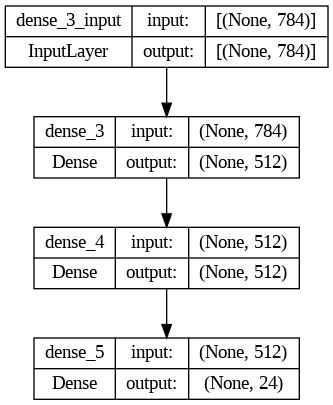

In [71]:
keras.utils.plot_model(model, show_shapes=True)


## Compiling the Model

We'll [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) our model with the same options as before, using binary crossentropy to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model.

$BCE(l, p) = -\frac{1}{N} \sum_{i=1}^{N} l_i \log(p_i) + (1 - l_i) \log(1 - p_i)
$

Besides loss [accuracy](https://keras.io/api/metrics/accuracy_metrics/) is also reported.

In [164]:
np.log(np.exp(1))

1.0

In [165]:
y_true = [[1, 0,0]]
y_pred = [[0.8, 0.1,0.1]]
loss = keras.losses.binary_crossentropy(y_true, y_pred)
loss

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1446214], dtype=float32)>

In [166]:
y_true = [1, 0,0]
y_pred = [0.8, 0.1,0.1]

bce=[]
for i in range(len(y_true)):

    ce=y_true[i]*np.log(y_pred[i])+(1-y_true[i])*np.log((1-y_pred[i]))
    bce.append(-ce)
mean(bce)

0.14462152754328741

In [167]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'])

## Train the Model

In [ ]:
history=model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 [==============================] - 12s 13ms/step - loss: 1.3307e-04 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.8659
Epoch 2/10
858/858 [==============================] - 10s 11ms/step - loss: 1.0289e-04 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.8639
Epoch 3/10
308/858 [=========>....................] - ETA: 5s - loss: 8.8243e-05 - accuracy: 1.0000

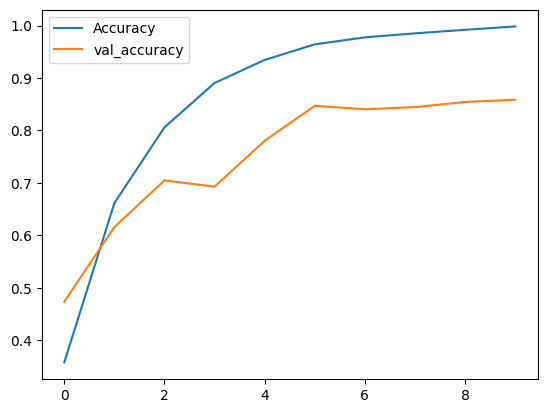

In [75]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['Accuracy', 'val_accuracy'])
plt.show()

## Summary

In this section you built your own neural network to perform image classification that is quite accurate. Congrats!

At this point we should be getting somewhat familiar with the process of loading data (incuding labels), preparing it, creating a model, and then training the model with prepared data.